In [30]:
#Importing:
import numpy
import pandas # Allows to manipulate datasets
from IPython.display import clear_output
import matplotlib.pyplot # Visualizator to graph the datasets
import tensorflow
from six.moves import urllib
import tensorflow.compat.v2.feature_column

# Data
The most important foundation of AIs is the data. The most famous tool for manipulating datasets is the Pandas, so it becames really important to know how to use that tool.

On the example bellow, I will be importing a dataset about the passagers of Titanic. There are two datasets, the trained one and the one for testing the data. The reason why there are two datasets is because we can not know if our model learned the patterns of the dataframe or just memorized them. With two dataframes we guarantee that it is possible to see the performance of the AI with data it has never seen before (It learned not memorized).

In [31]:
trainDataFrame = pandas.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # Train DataFrame
evaluationDataFrame = pandas.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # Perform DataFrame
y_train = trainDataFrame.pop('survived') # Target labels for training
y_evaluation = evaluationDataFrame.pop('survived') # Target labels for evaluation

# Returning the Pandas DataFrame
Basically, the method pandas.read_csv() is returning a dataset of a .csv file. It is also possible to get data from others files, just chaning the _csv.

The informations we are going to use should be stored in a different variable for avoiding mixing informations (Inputs and outputs). Thisseparation is essential so the model can learn to predict the target based on the features (extracted part of the dataframes).

# Others Pandas methods:
-> Those methods are important to learn because they are used very often.

In [32]:
trainDataFrame.head() # Returns the 5 first data of the DataFrame
evaluationDataFrame.describe() # Return a statitical analysis of the DataFrame
trainDataFrame.shape

(627, 9)

# Making Graphics
Observe: The comments after the method are explaining the syntax.

<Axes: >

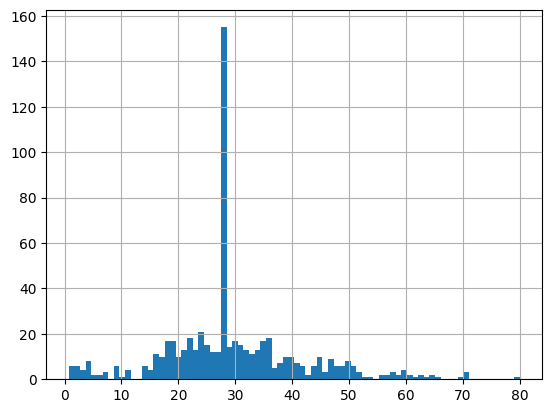

In [33]:
trainDataFrame.age.hist(bins=80) # dataframe.column.graphicType(bins=amountOfDivisions)


<Axes: ylabel='sex'>

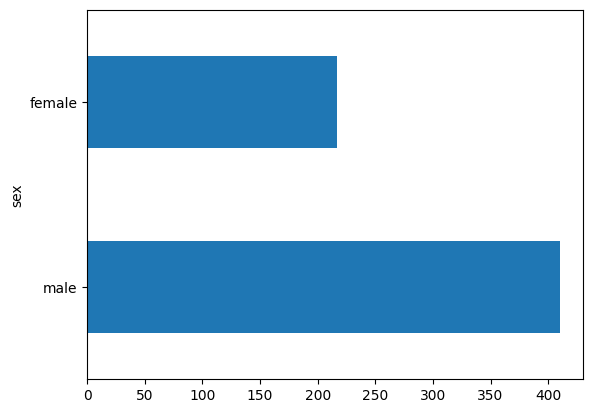

In [34]:
trainDataFrame.sex.value_counts().plot(kind='barh') # dataFrame.column.action().plot(kind=graphicType)

<Axes: ylabel='class'>

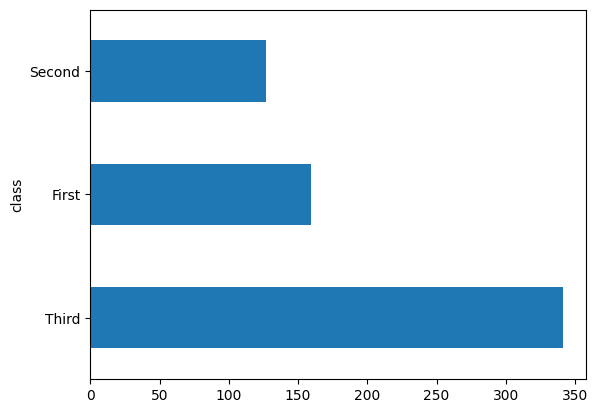

In [35]:
trainDataFrame['class'].value_counts().plot(kind='barh') # dataFrame[column].operator().plot(kind=GraphicType)

Text(0.5, 0, '% survive/100')

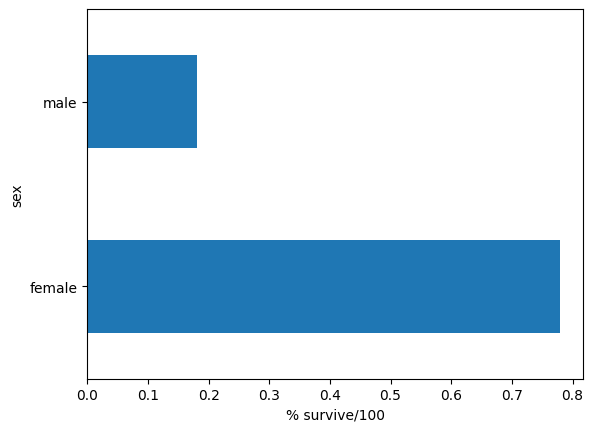

In [36]:
pandas.concat([trainDataFrame, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive/100')
# pandas.concat([dataFrame1, dataFrame2], axis=concatDirection)
# .groupby(paramenter) -> grouping the dataframe according to 1 data, every output will be in relation to the parameter
# set_xlable(string) -> Set up the lable for x-axis.

# Data Summary
Most passengers are in their 20's or 30's

Most passengers are male

Most passengers are in "Third" class

Females have a much higher chance of survival


# Categorial x Numeric Data
Numeric Data -> A data that is represented only by numbers, example: 5
Categorical Data -> A data that is represented by options, example: Male, Female 

Observation: Every categorical data is going to be transformed into a numeric data

# Preparing features columns
I.E.: Converting every categorical data to a numeric data and appending all features at a variable.


In [37]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for featureName in CATEGORICAL_COLUMNS:
    vocabulary = trainDataFrame[featureName].unique() #List of unique values from the given feature
    feature_columns.append(tensorflow.feature_column.categorical_column_with_vocabulary_list(featureName, vocabulary))

for featureName in NUMERIC_COLUMNS:
    feature_columns.append(tensorflow.feature_column.numeric_column(featureName, dtype=tensorflow.float32))

# The Training Process
Bratches: The amount of data that is going per time to the moldel processment.
Epochs: The amount of times the model is going to process the same dataset

It is nescessairy an Input Function to break the dataset into the Bratches and define the amount of epochs.

In [38]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        dataset = tensorflow.data.Dataset.from_tensor_slices((dict(data_df),label_df)) #Creating a tensorflow.data.Dataset object with data and its label
        if shuffle:
            dataset = dataset.shuffle(1000) # Randomizing the data order
        dataset = dataset.batch(batch_size).repeat(num_epochs) # Splitting dataset into batches and repeating for number of epochs
        return dataset #Returning dataset
    return input_function #Return a function object for use

train_input_fn = make_input_fn(trainDataFrame, y_train) # Calling the input_function  to get the dataset to feed the model
eval_input_fn = make_input_fn(evaluationDataFrame, y_evaluation, num_epochs=1, shuffle=False)

In [39]:
# Creating the model
linear_est = tensorflow.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Eduardo\\AppData\\Local\\Temp\\tmp77_6wccb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [47]:
# Training the model:
linear_est.train(train_input_fn)# Get model metrics/stats by testing on testing data
result = linear_est.evaluate(eval_input_fn)

clear_output() # Clears console output

linear_est.train(train_input_fn)# Get model metrics/stats by testing on testing data
result = linear_est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Eduardo\AppData\Local\Temp\tmp77_6wccb\model.ckpt-41200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 41200...
INFO:tensorflow:Saving checkpoints for 41200 into C:\Users\Eduardo\AppData\Local\Temp\tmp77_6wccb\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 41200...
INFO:tensorflow:loss = 0.5135168, step = 41200
INFO:tensorflow:global_step/sec: 600.469
INFO:tensorflow:loss = 0.31687596, step = 41300 (0.167 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 41400...
INFO:tensorflow:Saving checkpoints for 41400 into C:\Users\Eduardo\AppData\Local\Temp\tmp77_6wccb\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after s

In [48]:
# Printing accuracy
print(result['accuracy'])

0.780303


In [71]:
result = list(linear_est.predict(eval_input_fn))
personIndex = 7
print(evaluationDataFrame.loc[personIndex])
print("Status: Dead" if y_evaluation.loc[personIndex] == 0 else "Status: Alive")
print("Chances of surviving: " + str(result[personIndex]['probabilities'][1]))
print(y_evaluation)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Eduardo\AppData\Local\Temp\tmp77_6wccb\model.ckpt-41400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                          21.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 7, dtype: object
Status: Dead
Chances of surviving: 0.11189198
0      0
1      0
2      1
3      1
4      1
      ..
259    1
260    0
261    0
262    0
263    1
Name: survived, Length: 264, dtype: int64
